In [1]:
## Figure 15 - Plot Velocity Map for the whole Galapagos Islands from Sentinel-1 data

import os
import matplotlib.pyplot as plt
from pysar.simulation.plot import *
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp, utils as ut
from pysar import view

work_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE')
os.chdir(work_dir)
print('Go to directory: '+work_dir)
print_msg = False

## Prepare Data File
generate_masked_dem = False
if generate_masked_dem:
    cmd = 'load_hdf5.py ../../DEM/demLat_S02_N01_Lon_W092_W090.dem.wgs84 -o dem.h5 --data-type np.float32\n'
    cmd += 'generate_mask.py dem.h5 -m 0.5 -o demWaterMask.h5\n'
    cmd += 'mask.py dem.h5 -m demWaterMask.h5'
    print(cmd)
    os.system(cmd)

generate_velocity = False
if generate_velocity:
    cmd = 'subset.py geo_velocity_masked.h5 -r dem.h5 -o velocity_masked.h5 --outfill NaN'
    print(cmd)
    os.system(cmd)

proj_name = sensor.project_name2sensor_name(work_dir)[1]
out_file = 'velocity_{}.png'.format(proj_name)
print('Done.')

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE
Done.


view.py velocity_masked.h5 velocity --mask no --sub-lat -1.2 0.2 --sub-lon -91.7 -90.75 -c jet --wrap --wrap-range -3 7 --nocbar --dem dem_masked.h5 --dem-nocontour --ref-size 4 --lalo-label --scalebar 0.2 0.8 0.03 --scalebar-pad 0.03 --notitle --fontsize 12 


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


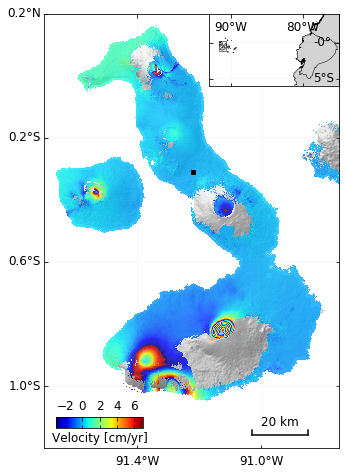

In [8]:
## plot velocity with functions from pysar/view.py
geo_box = (-91.7, 0.2, -90.75, -1.2)    # WNES
W, N, E, S = geo_box

cmd =  'view.py velocity_masked.h5 velocity --mask no '
cmd += '--sub-lat {} {} --sub-lon {} {} '.format(S, N, W, E)
cmd += '-c jet --wrap --wrap-range -3 7 --nocbar '
cmd += '--dem dem_masked.h5 --dem-nocontour --ref-size 4 '
cmd += '--lalo-label --scalebar 0.2 0.8 0.03 --scalebar-pad 0.03 --notitle --fontsize 12 '
print(cmd)

fig, ax = plt.subplots(figsize=[6, 8])
data, atr ,inps = view.prep_slice(cmd, print_msg=print_msg)
ax, inps, im = view.plot_slice(ax, data, atr, inps, print_msg=print_msg)[0:3]

# colorbar
cax = fig.add_axes([0.2, 0.16, 0.2, 0.02])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.ax.xaxis.tick_top()
cbar.ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True)
cbar.set_label('Velocity [cm/yr]', fontsize=font_size)
## plot POI
#wolf_lalo = (0.0232, -91.2838)
#ax.plot(wolf_lalo[1], wolf_lalo[0],'^', ms=6, mec='k', mfc='none', mew=1.)


# insert location map
ax2 = fig.add_axes([0.554, 0.717, 0.3, 0.2])
geo_box_loc = (-93, 4, -75, -6)  # WNES
m = pp.BasemapExt(llcrnrlon=geo_box_loc[0], llcrnrlat=geo_box_loc[3],
                  urcrnrlon=geo_box_loc[2], urcrnrlat=geo_box_loc[1],
                  projection='cyl', resolution='h', suppress_ticks=False, ax=ax2)
m.fillcontinents(color='lightgray')
m.drawcountries()
m.drawcoastlines(linewidth=0.5)
m.draw_lalo_label(geo_box_loc, ax=ax2, lalo_step=[5, 10], labels=[0, 1, 1, 0], xoffset=-3.6, yoffset=-2.8, font_size=font_size, print_msg=print_msg)
# plot AOI box
ax2.plot([W, E, E, W, W], [N, N, S, S, N], linewidth=0.5, color='k')

## save to jpg file
fig.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()